## Historic Morelia weather records from NOAA

These records are from https://www.ncdc.noaa.gov/cdo-web/orders?id=2079422&email=will@henney.org

In theory they cover the mean/min/max temperature, plus rainfall for the Morelia weather station from 1977 to 2020.  They do not cover humidity unfortunately.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_color_codes()

In [2]:
df = pd.read_csv("../2079422.csv", index_col=2, parse_dates=True)
df

,STATION,NAME,PRCP,PRCP_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,
1977-04-05,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,18.3,"H,,S",NaN,NaN,NaN,NaN
1977-04-06,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,17.3,"H,,S",NaN,NaN,NaN,NaN
1977-04-07,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,18.0,"H,,S",NaN,NaN,NaN,NaN
1977-04-09,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,15.0,"H,,S",NaN,NaN,NaN,NaN
1977-04-11,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,18.3,"H,,S",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,19.7,"H,,S",31.2,",,S",10.2,",,S"
2020-03-07,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,15.9,"H,,S",27.9,",,S",7.4,",,S"
2020-03-08,MXM00076665,"MORELIA MICH., MX",0.0,",,S",NaN,NaN,18.7,"H,,S",28.5,",,S",7.4,",,S"


In [3]:
df.describe()

,PRCP,SNWD,TAVG,TMAX,TMIN
count,11469.000000,1.0,12255.000000,9354.000000,9279.000000
mean,1.719086,51.0,19.087523,27.598525,10.261698
std,7.195303,NaN,2.981330,3.133148,3.532809
min,0.000000,51.0,8.800000,13.700000,-5.000000
25%,0.000000,51.0,17.200000,25.500000,7.600000
50%,0.000000,51.0,19.100000,27.300000,11.000000
75%,0.000000,51.0,20.900000,29.400000,13.100000
max,461.800000,51.0,30.200000,37.800000,17.600000


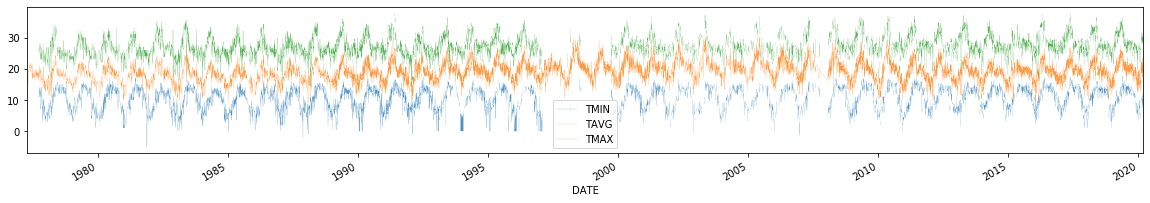

In [4]:
df.plot(y=["TMIN", "TAVG", "TMAX"], use_index=True, figsize=(20, 3), lw=0.2, alpha=0.8)

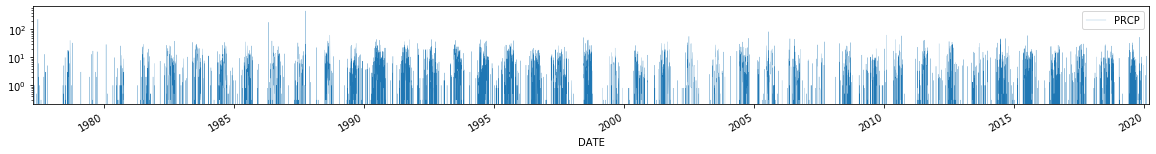

In [5]:
df.plot(y="PRCP", use_index=True, figsize=(20, 2), lw=0.2, logy=True)

In [6]:
df.index.day

Int64Index([ 5,  6,  7,  9, 11, 20, 21, 26, 29,  1,
            ...
             1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
           dtype='int64', name='DATE', length=12255)

In [7]:
df["DAY"] = df.index.dayofyear

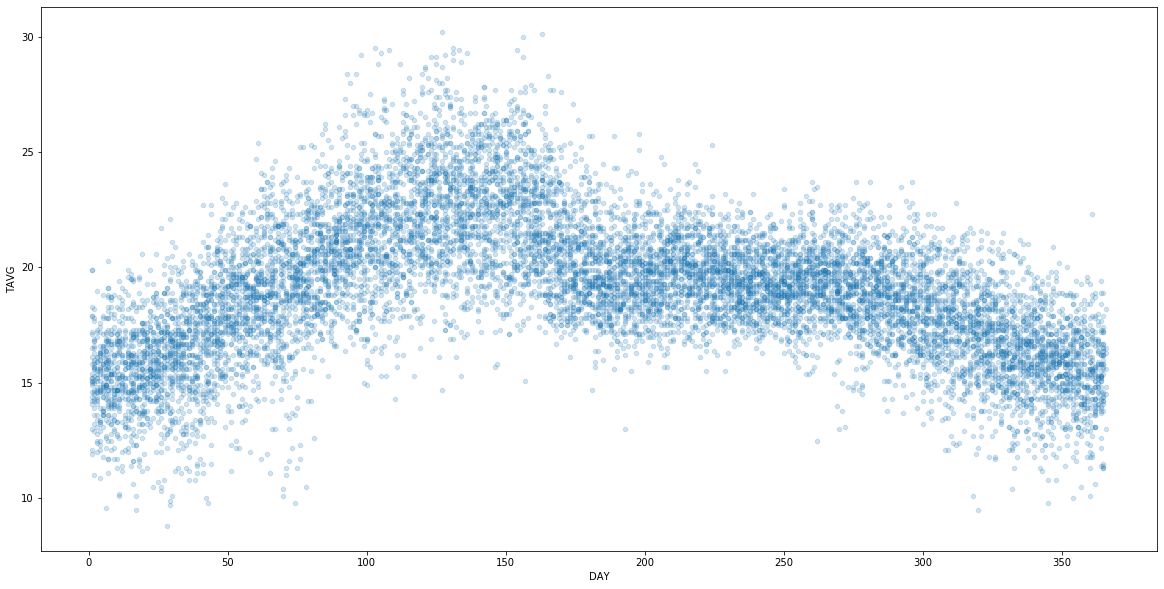

In [8]:
df.plot("DAY", "TAVG", "scatter", figsize=(20, 10), alpha=0.2)

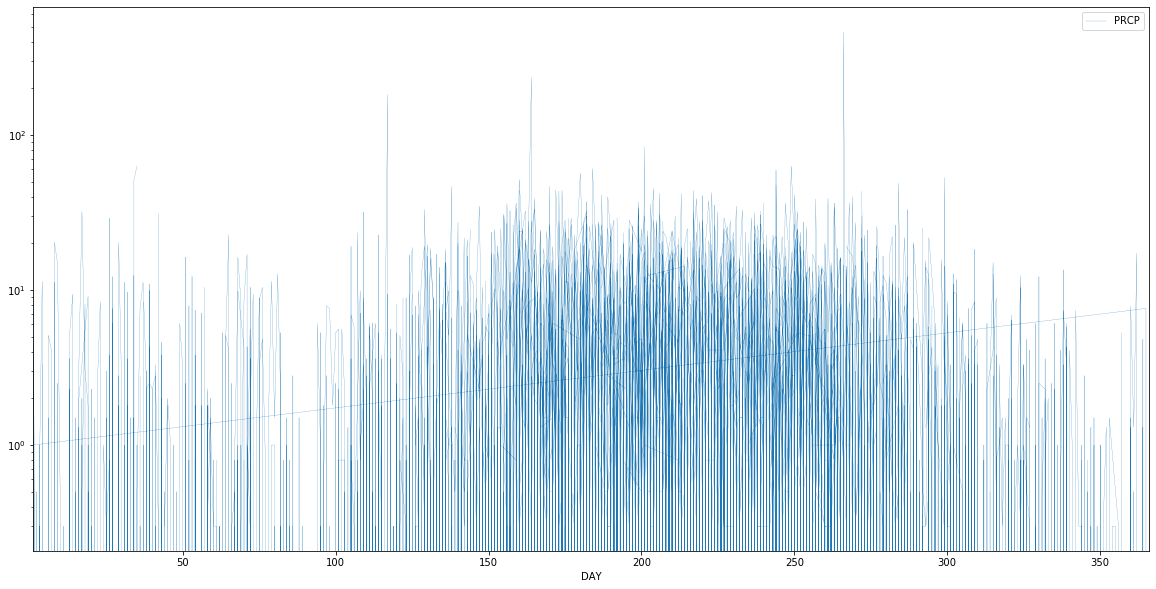

In [9]:
df.plot("DAY", "PRCP", figsize=(20, 10), lw=0.2, logy=True)

In [10]:
df_outside = pd.read_csv(
    "../netatmo_module.csv", sep=";", index_col=1, parse_dates=True
)

In [11]:
df_outside.describe()

,Timestamp,Temperature,Humidity
count,2.082490e+05,208249.000000,208249.000000
mean,1.553481e+09,20.095511,60.040495
std,1.886679e+07,4.217189,17.075303
min,1.520633e+09,6.900000,12.000000
25%,1.537449e+09,17.300000,48.000000
50%,1.553761e+09,19.700000,63.000000
75%,1.569900e+09,22.800000,74.000000
max,1.585591e+09,34.300000,100.000000


In [12]:
df_outside

,Timestamp,Temperature,Humidity
DateTime,,,
2018-03-09 16:00:39,1520632839,29.8,36
2018-03-09 16:04:36,1520633076,30.1,33
2018-03-09 16:08:53,1520633333,29.6,32
2018-03-09 16:14:01,1520633641,29.1,31
2018-03-09 16:19:08,1520633948,28.6,33
...,...,...,...
2020-03-30 11:40:47,1585590047,28.1,41
2020-03-30 11:45:54,1585590354,28.1,39
2020-03-30 11:51:02,1585590662,28.0,38


In [13]:
df_outside["DAY"] = df_outside.index.dayofyear

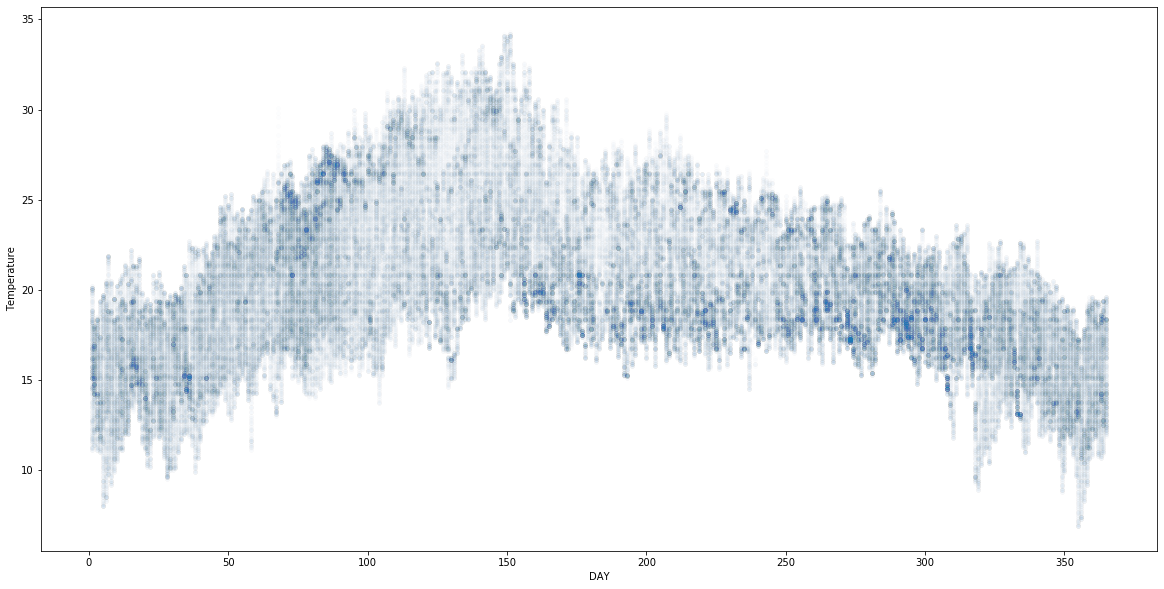

In [14]:
df_outside.plot("DAY", "Temperature", "scatter", figsize=(20, 10), lw=0.2, alpha=0.01)

In [15]:
df_mean = df_outside.resample("1D").mean()

In [16]:
df_mean

,Timestamp,Temperature,Humidity,DAY
DateTime,,,,
2018-03-09,1.520647e+09,23.303125,41.250000,68.0
2018-03-10,1.520705e+09,19.783972,45.996516,69.0
2018-03-11,1.520791e+09,21.477193,41.140351,70.0
2018-03-12,1.520878e+09,22.277622,41.692308,71.0
2018-03-13,1.520964e+09,22.776923,41.569930,72.0
...,...,...,...,...
2020-03-26,1.585246e+09,23.828521,40.380282,86.0
2020-03-27,1.585332e+09,23.840351,40.333333,87.0
2020-03-28,1.585418e+09,23.327465,44.218310,88.0


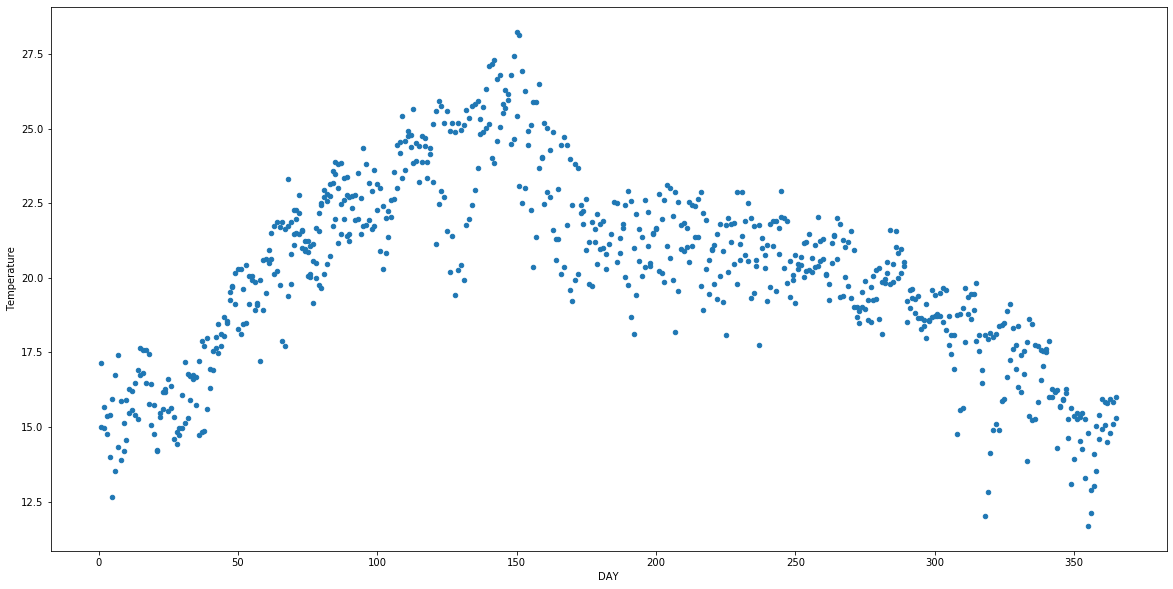

In [17]:
df_mean.plot("DAY", "Temperature", "scatter", figsize=(20, 10), lw=1)

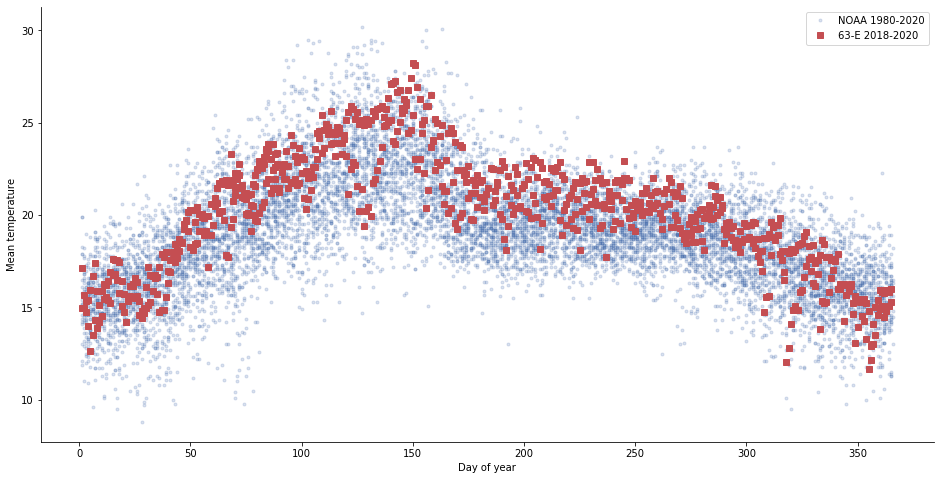

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(
    "DAY", "TAVG", ".", data=df, lw=0.2, color="b", alpha=0.2, label="NOAA 1980-2020"
)
ax.plot(
    "DAY",
    "Temperature",
    "s",
    data=df_mean,
    label="63-E 2018-2020",
    lw=4,
    color="r",
    alpha=1.0,
)
ax.legend()
ax.set(
    xlabel="Day of year",
    ylabel="Mean temperature",
)
sns.despine()

So this shows the mean outside daily temperature in orange for 2018-20, superimposed on the NOAA data from 1977-2020.  The agreement is very good.

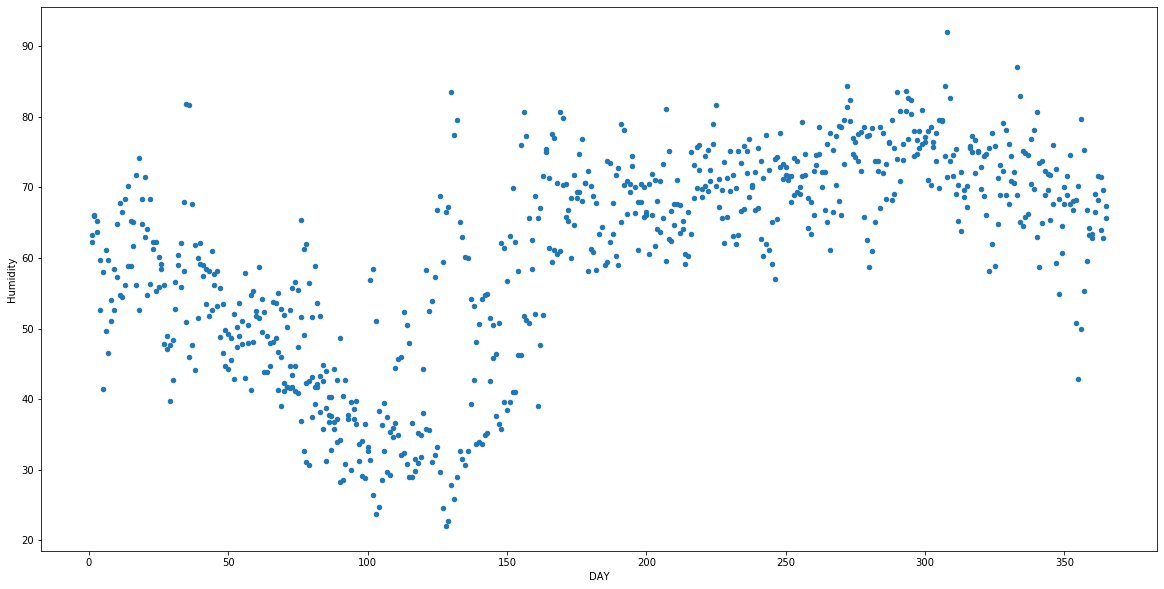

In [19]:
df_mean.plot("DAY", "Humidity", "scatter", figsize=(20, 10), lw=1)

From the paper https://papers.ssrn.com/sol3/Papers.cfm?abstract_id=3551767 the relation between humidity, temperature and COVID-19 $R$ value is
$$
R = 3.968 − 0.0383 T − 0.0224 H
$$


In [20]:
df_mean["R"] = 3.968 - 0.0383 * df_mean["Temperature"] - 0.0224 * df_mean["Humidity"]

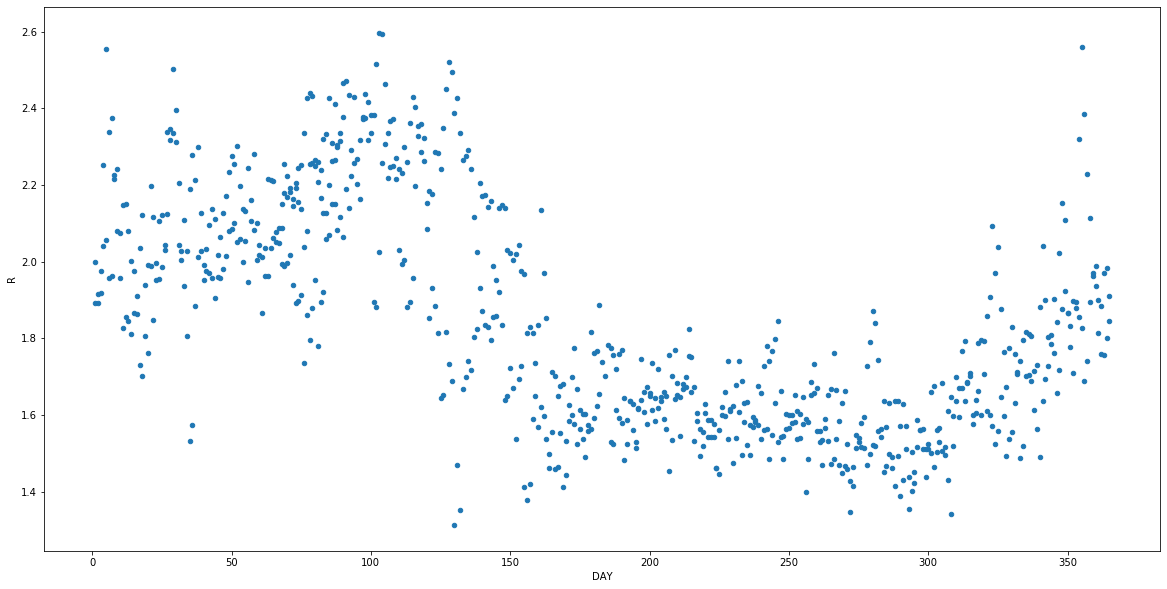

In [21]:
df_mean.plot("DAY", "R", "scatter", figsize=(20, 10), lw=1)

Fraction of population that needs to be immune in order to achieve herd immunity: $f = 1 - 1/R$

In [22]:
df_mean["f"] = 1.0 - 1.0 / df_mean["R"]

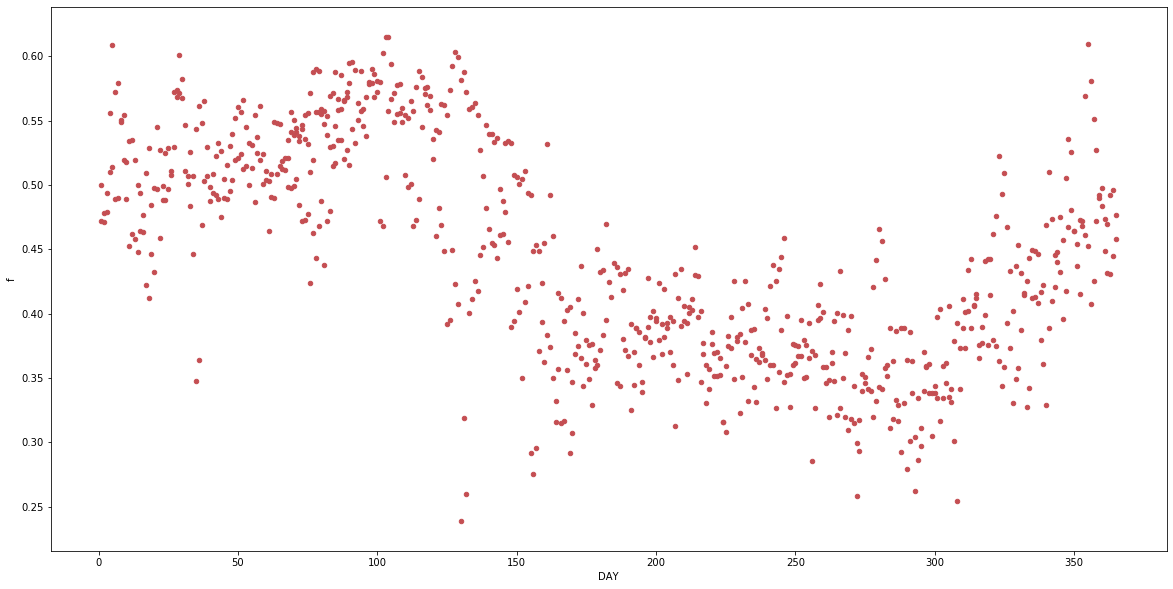

In [23]:
df_mean.plot("DAY", "f", "scatter", figsize=(20, 10), lw=1, c="r")

With social distancing, the reproduction number could be further reduced.  Try out 0, 20, 50% reductions

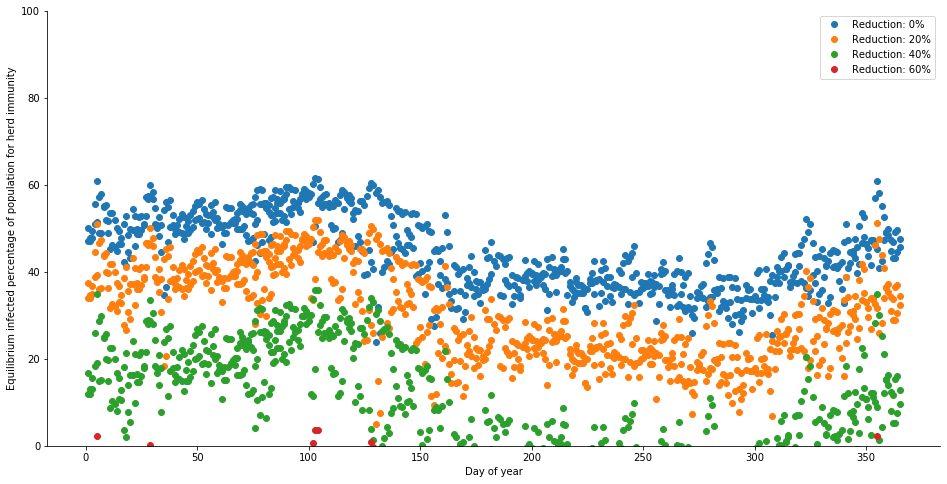

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))

day = df_mean["DAY"]
R = df_mean["R"]
for reduction in 0, 20, 40, 60:
    f = 1.0 - 1.0 / ((1 - reduction / 100) * R)
    ax.plot(day, 100 * f, "o", label=f"Reduction: {reduction}%")
ax.legend()
ax.set(
    xlabel="Day of year",
    ylabel="Equilibrium infected percentage of population for herd immunity",
    ylim=[0, 100],
)
sns.despine()

### Conclusion

In the rainy season, with no additional measures, we need 40% of population infected (or vaccinated) in order for herd immunity to stop outbreaks.  This rises to 60% in dry season.  This assumes that people cannot be re-infected once they have caught the disease once

A 40% reduction in reproduction rate (from hygiene measures and social distancing) would be enough to reduce that to almost zero in rainy season.  And that would need to be a 60% reduction during the dry season.  Note that the reduction measures need to be permanent in order to be effective in the long term.

### Update 2020-03-29

There have been several more recent papers that suggest that it is the absolute humidity that matters.  For instance, [Qasim Bukhari and Yusuf Jameel. Will coronavirus pandemic diminish by summer? SSRN, March 2020.](https://ssrn.com/abstract=3556998)


The absolute humidity follows from the Clausius–Clapeyron equation:
$$
\mathrm{AH} =
\frac{
13.247\, H \, e^{17.6 T / (T + 243.5)}
}{
273.15 + T
} \ \mathrm{g\,m^{-3}} \ ,
$$
where $T$ is temperature in celsius and $H$ is relative humidity in per-cent.

In [25]:
import numpy as np

In [26]:
sns.set_context("poster")

In [27]:
T = df_mean["Temperature"]
df_mean["AH"] = (
    13.247 * df_mean["Humidity"] * np.exp(17.6 * T / (T + 243.5)) / (273.15 + T)
)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
scat = ax.scatter(
    "DAY",
    "AH",
    data=df_mean,
    c=df_mean.index.year,
    edgecolors="k",
    linewidths=0.5,
    marker=".",
    s=50,
    vmin=2017.5,
    vmax=2021.7,
    cmap="viridis_r",
)
cb = fig.colorbar(scat, ax=ax, ticks=[2018, 2019, 2020, 2021], format="%d")
ax.axhspan(4.0, 10.0, color="r", alpha=0.1, zorder=-10)
for i, s in zip(
    [0, 91, 182, 273],
    ["winter\nsolstice", "spring\nequinox", "summer\nsolstice", "autumn\nequinox"],
):
    # Try and hit equinoxes and solstices
    iday = (i - 10) % 365
    ax.axvline(iday, color="k", ls="--", zorder=-10, alpha=0.3, ymax=0.85)
    ax.text(iday, 18.0, s, ha="center")
ax.set(
    ylim=[0, 20],
    ylabel="Absolute humidity, g/m$^3$",
    xlabel="Day of year",
)
sns.despine()
fig.tight_layout()
fig.savefig("morelia-absolute-humidity-2018-to-2020.pdf")